In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

t4 146 149 [4.93 4.99]
t4 133 149 [4.67 4.99]
t4 127 131 [4.55 4.63]
t4 95 148 [3.91 4.97]
t2 50 81 [3.01 3.63]
t2 60 83 [3.21 3.67]
t2 61 79 [3.23 3.59]
t2 48 54 [2.97 3.09]


(0.0, 1.0)

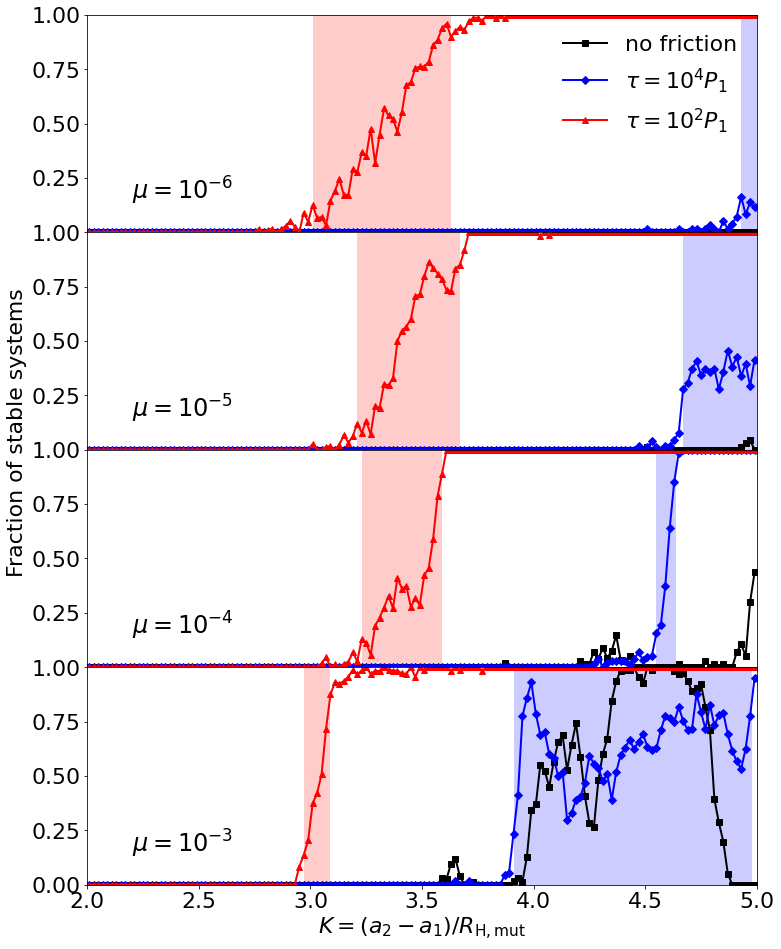

In [30]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, sharey=False, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt0.npy'%(6-iii))
    #print('t0 number of runs:',len(data[:,0]))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'s-',c='k',lw=2,label='no friction')
    #axs[iii].scatter(bins,safe_hist/tot_hist,c='k',s=10,marker='s')
    

    axs[iii].text(2.20,0.15,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)
    

    
    axs[iii].set_yticks([0.25,0.5,0.75,1.0])
    axs[iii].set_ylim([0.0,1.0])

    
for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt4.npy'%(6-iii))
    #print('t4 number of runs:',len(data[:,0]))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'D-',c='b',lw=2,label=r'$\tau = 10^4P_1$')
    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    print('t4',igzmin,igzmax,bins[[igzmin,igzmax]])
    #axs[iii].fill_between(bins[[igzmin,igzmax]],[0,0],[1,1],edgecolor='none',facecolor='b',alpha=0.2)
    axs[iii].fill_between([bins[igzmin],bins[igzmax]+0.01],[0,0],[1,1],edgecolor='none',facecolor='b',alpha=0.2)

    
for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt2.npy'%(6-iii))
    #print('t2 number of runs:',len(data[:,0]))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'^-',c='r',lw=2,label=r'$\tau = 10^2P_1$')
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    print('t2',igzmin,igzmax,bins[[igzmin,igzmax]])
    axs[iii].fill_between(bins[[igzmin,igzmax]],[0,0],[1,1],edgecolor='none',facecolor='r',alpha=0.2)
        
    
axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
axs[0].legend(frameon=False)
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel('                                    Fraction of stable systems')

axs[-1].set_xlim([2.0,5.0])
axs[-1].set_ylim([0.0,1.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

#plt.savefig('./pics/pics-fraction-N3-T6-rev2.pdf',bbox_inches='tight',transparent=True)
#plt.savefig('./pics/pics-fraction-N3-T6-rev2.png',bbox_inches='tight',transparent=True)


[1.20442118] [0.00323041] 2.803030303030303 27.727336535870183 4.926118052908437 3.265569369145536
[1.44849712] [0.00382317] 2.772727272727273 13.27875456705579 4.758815211603039 3.3780737694987892
[1.71164444] [0.00547169] 2.681818181818182 6.638250844325808 4.538480854801325 3.3700138802330883
[1.90097975] [0.01028746] 2.5 3.5677588178477313 4.313593496283824 3.2615044355635048


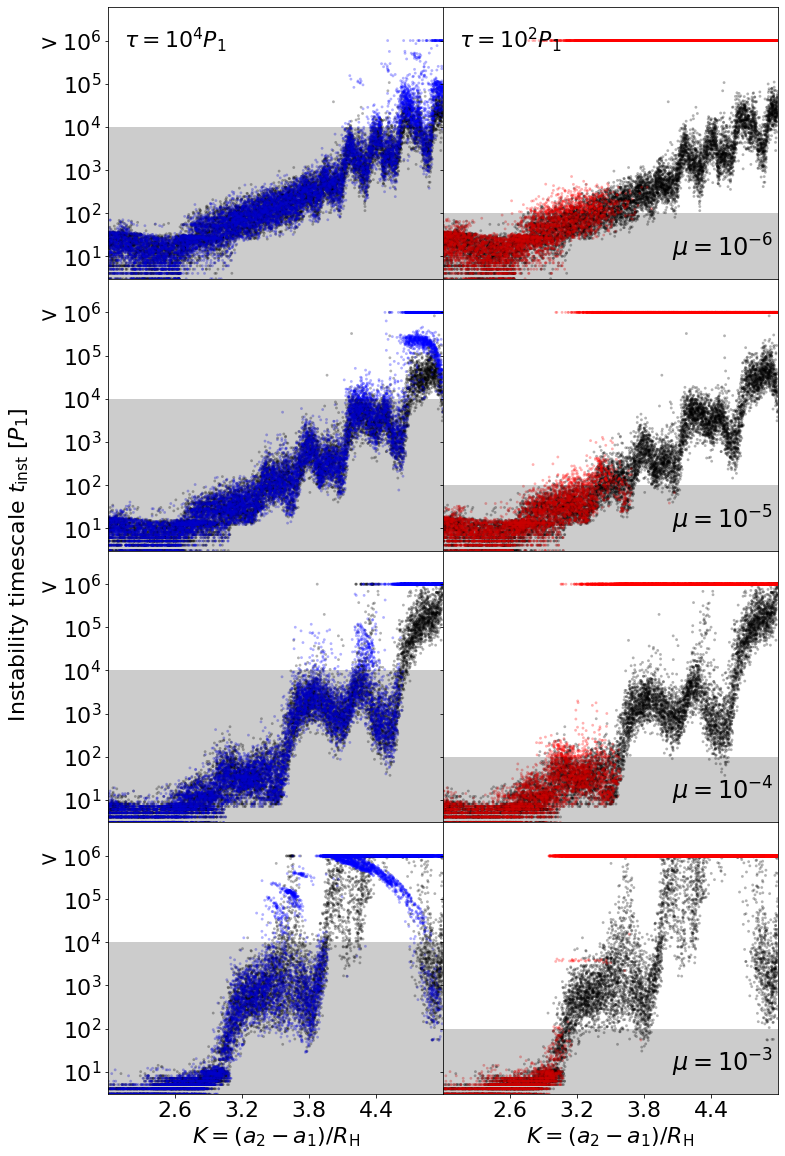

In [33]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


def K_to_Tsyn(K,mu):
    a1 = 1.
    eta = ((mu)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn

K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

K_gz_list = [3.29,3.19,3.01,2.65]
K_crit_list = [3.47,3.47,3.43,3.69]

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,2, sharex=True, sharey=True,figsize=(12,20))
fig.subplots_adjust(hspace=0.0,wspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt0.npy'%(6-iii))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii,0].scatter(K,Tinst,c='k',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,0].set_yscale('log')
    axs[iii,0].set_ylim([3.0e0,6e6])
    axs[iii,0].set_yticks([1e1,1e2,1e3,1e4,1e5,1e6])
    axs[iii,0].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',r'$>10^{6}$'])  
    axs[iii,1].scatter(K,Tinst,c='k',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,1].set_yscale('log')
    axs[iii,1].set_ylim([3.0e0,6e6])
    axs[iii,1].set_yticks([1e1,1e2,1e3,1e4,1e5,1e6])
    axs[iii,1].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',r'$>10^{6}$']) 
    axs[iii,1].text(4.05,1e1,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
    Tsyn = K_to_Tsyn(K,mu*2)
    Kl = np.linspace(2,5,100)
    Tsynl =  K_to_Tsyn(Kl,mu*2)
    for ik in range(len(Kl)-1):
        ind_k = (K>Kl[ik]) * (K<Kl[ik+1])
        K_sub = K[ind_k]
        Tinst_sub = Tinst[ind_k]
        if np.sum(Tinst_sub>Tsynl[ik])>(0.5*np.sum(Tinst_sub>0)):
            Ksyn = 0.5*(Kl[ik]+Kl[ik+1])
            break
            
    Kl = np.linspace(2,Ksyn,100)
    Tsynl =  K_to_Tsyn(Kl,mu*2)        
    #axs[iii,0].plot(Kl,Tsynl,c='m',lw=5,ls='--')
    #axs[iii,1].plot(Kl,Tsynl,c='m',lw=5,ls='--')
    #axs[iii,0].axvline(x=Ksyn,c='b',lw=3,ls='-.')
    #axs[iii,1].axvline(x=Ksyn,c='b',lw=3,ls='-.')
    
    Tsyn_0 = K_to_Tsyn(Ksyn,mu*2)
    def Tins_fit(K,b):
        return b*(K-Ksyn)+np.log10(Tsyn_0)
    
    ind_fit = (K>Ksyn) * (data[:,0]<0.5)
    X_fit = K[ind_fit]
    Y_fit = np.log10(Tinst[ind_fit])
    popt, pcov = curve_fit(Tins_fit, X_fit, Y_fit)
    b = popt[0]
    print(popt,np.sqrt(np.diag(pcov)),Ksyn,Tsyn_0,(np.log10(1e4/Tsyn_0)/b+Ksyn),(np.log10(1e2/Tsyn_0)/b+Ksyn))
    kk_fit = np.linspace(Ksyn,5,11)
    #axs[iii,0].plot(kk_fit, 10**(Tins_fit(kk_fit, *popt)), color='m', linewidth=3)
    #axs[iii,1].plot(kk_fit, 10**(Tins_fit(kk_fit, *popt)), color='m', linewidth=3)
    

    
for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt4.npy'%(6-iii))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii,0].scatter(K,Tinst,c='b',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,0].fill_between([2,5],[1e-2,1e-2],[1e4,1e4],edgecolor='none',facecolor='k',alpha=0.2)



for iii in [0,1,2,3]:  
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt2.npy'%(6-iii))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii,1].scatter(K,Tinst,c='r',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,1].fill_between([2,5],[1e-2,1e-2],[1e2,1e2],edgecolor='none',facecolor='k',alpha=0.2)
            
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()

axs[0,0].text(2.6,7e5,r'$\tau=10^{4}P_1$',ha='center')
axs[0,1].text(2.6,7e5,r'$\tau=10^{2}P_1$',ha='center')

axs[-1,0].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H}}$')
axs[-1,1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H}}$')
axs[2,0].set_ylabel(r'                                   Instability timescale $t_{\rm inst}$ [$P_1$]')

axs[-1,0].set_xlim([2.0,5.0])
axs[-1,1].set_xlim([2.0,5.0])
axs[-1,0].set_xticks([2.6,3.2,3.8,4.4])
axs[-1,1].set_xticks([2.6,3.2,3.8,4.4])

#plt.savefig('./pics/pics-time_wf-wRH-rev.pdf',bbox_inches='tight',transparent=True)
#plt.savefig('./pics/pics-time_wf-wRH-rev.png',bbox_inches='tight',transparent=True)

plt.savefig('./pics/pics-time_wf-N3-T6-rev2-m.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-time_wf-N3-T6-rev2-m.png',bbox_inches='tight',transparent=True)